In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *
from rulebased_classifier import RuleBasedClassifier

In [2]:
with open("wdbc.pkl", "rb") as f: 
    data = pickle.load(f)

print(type(data)) 
print(data.shape) 


<class 'pandas.core.frame.DataFrame'>
(569, 32)


<Axes: xlabel='malignant'>

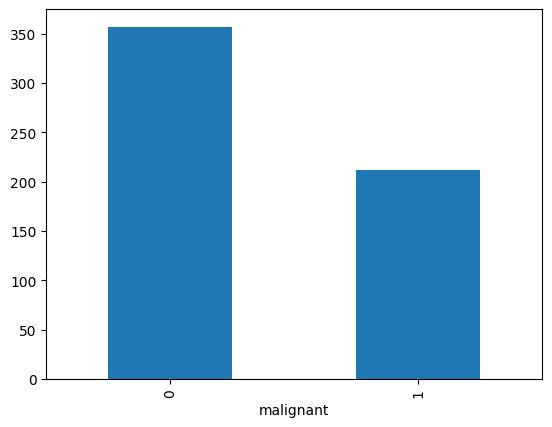

In [3]:
data['malignant'].value_counts().plot(kind='bar')

In [4]:
data.columns

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')

    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values) : Measures how intensity (brightness) varies across the nucleus in an image.
	c) perimeter : Measures the total boundary length of the nucleus.
	d) area : A larger area suggests an abnormally growing cell (common in cancerous cells)
	e) smoothness (local variation in radius lengths) : A high smoothness value means a more uniform shape, while a low smoothness value means the edges are highly irregular.
	f) compactness (perimeter^2 / area - 1.0) : Higher compactness suggests an irregular or elongated shape, which is more common in cancerous cells.
	g) concavity (severity of concave portions of the contour) : Higher concavity means the nucleus has deeper and more severe indentations 
	h) concave points (number of concave portions of the contour) : More concave points suggest irregular growth patterns, often seen in cancerous cells.
	i) symmetry : Normal cells tend to be highly symmetrical, while cancerous cells often exhibit asymmetry.
	j) fractal dimension ("coastline approximation" - 1) : A higher fractal dimension suggests a more complex, irregular shape

| **Feature**           | **What It Measures**           | **Normal Cell Behavior**   | **Cancerous Cell Behavior**   |
|----------------------|-----------------------------|--------------------------|-----------------------------|
| **Radius**           | Size of the nucleus         | Small, uniform          | Larger, irregular         |
| **Texture**         | Variation in brightness      | Smooth intensity        | High variability          |
| **Perimeter**       | Length of boundary          | Shorter, round shape    | Longer, irregular shape   |
| **Area**            | Total size                   | Smaller                 | Larger                    |
| **Smoothness**      | Edge uniformity             | Smooth                  | Irregular edges           |
| **Compactness**     | Shape density               | Dense, circular         | More stretched or jagged  |
| **Concavity**       | Depth of inward curves      | Few or none             | Deep indentations         |
| **Concave Points**  | Number of inward curves     | Few                     | Many                      |
| **Symmetry**        | Balance of shape            | Symmetrical             | Asymmetrical              |
| **Fractal Dimension** | Irregularity of edges     | Low                     | High                      |


size = area, perimeter, radius
shape = smoothness, concavity, concave points
texture = texture
homog = symmetry

In [5]:
data = data.drop(['id'], axis=1)
patient_X, patient_y = data.drop(['malignant'], axis=1), data['malignant']
patient_X, patient_X_test, patient_y, patient_y_test = train_test_split(patient_X, patient_y, test_size=0.1, random_state=42)

patient_df = pd.concat([patient_X, patient_y], axis=1)
patient_test = pd.concat([patient_X_test, patient_y_test], axis=1)


In [6]:
patient_df[patient_df['malignant'] == 1].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0
mean,17.420872,21.572359,115.079128,975.335897,0.102842,0.145239,0.160762,0.087377,0.193436,0.062737,...,29.368769,140.954923,1417.431282,0.145154,0.376601,0.453310,0.182564,0.325534,0.091672,1.0
std,3.269915,3.797949,22.250138,376.680538,0.012760,0.054032,0.074483,0.033938,0.027937,0.007754,...,5.466704,29.856239,612.402699,0.022298,0.168342,0.179633,0.046398,0.076391,0.021871,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,1.0
25%,14.970000,19.270000,97.405000,691.900000,0.093940,0.110450,0.110850,0.063990,0.174900,0.056525,...,25.785000,118.250000,941.450000,0.131050,0.253500,0.331400,0.153800,0.279950,0.076285,1.0
50%,17.300000,21.430000,113.400000,930.900000,0.101800,0.133600,0.151900,0.086530,0.190700,0.061320,...,29.250000,136.800000,1302.000000,0.143500,0.358300,0.410700,0.182000,0.312600,0.088150,1.0
75%,19.590000,23.655000,129.950000,1204.500000,0.110950,0.169850,0.200550,0.101800,0.210100,0.067510,...,32.210000,158.800000,1702.500000,0.156250,0.448000,0.557050,0.210850,0.361300,0.102850,1.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,1.0


In [7]:
patient_df[patient_df['malignant'] == 0].describe()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2,malignant
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0
mean,12.173842,17.894921,78.248265,465.089590,0.091880,0.079642,0.046449,0.025466,0.173081,0.062783,...,23.537098,87.291009,562.298423,0.124248,0.182676,0.168400,0.074579,0.269338,0.079526,0.0
std,1.793027,3.985937,11.894030,135.785508,0.013062,0.034333,0.044886,0.015716,0.024648,0.006781,...,5.513397,13.677011,165.936074,0.019966,0.092941,0.144188,0.036329,0.041295,0.014060,0.0
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.0
25%,11.080000,15.150000,70.870000,378.200000,0.082840,0.054920,0.020310,0.014730,0.157300,0.058350,...,19.590000,78.280000,450.000000,0.110100,0.110900,0.076980,0.050520,0.240400,0.070070,0.0
50%,12.220000,17.310000,78.290000,461.000000,0.090570,0.074280,0.037350,0.023430,0.170900,0.061440,...,22.800000,86.970000,549.100000,0.123400,0.167900,0.142300,0.074850,0.268100,0.077220,0.0
75%,13.450000,19.730000,86.240000,553.500000,0.100400,0.097130,0.059880,0.032510,0.187900,0.065740,...,26.510000,97.110000,674.700000,0.136300,0.231500,0.222000,0.098040,0.297700,0.085240,0.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,0.0


# Task 1

## RULE BASED CLASSIFIER 1

In [ ]:
patient_X_train, patient_X_val, patient_y_train, patient_y_val = train_test_split(patient_X, patient_y, test_size=0.2, random_state=42)

patient_df_train = pd.concat([patient_X_train, patient_y_train], axis=1)
patient_df_val = pd.concat([patient_X_val, patient_y_val], axis=1)

In [31]:
size = ['area', 'perimeter', 'radius']
shape = ['smoothness', 'compactness', 'concavity', 'concave points']
texture = ['texture']
homog = ['symmetry', 'fractal dimension']
C = RuleBasedClassifier( size, shape, texture, homog, decision_option="all")

In [9]:
C.fit(patient_X_train, patient_y_train)

In [10]:
C.score(patient_X_val, patient_y_val)

(0.8640776699029126,
 0.7727272727272727,
 0.8947368421052632,
 0.8292682926829269,
 array([[55, 10],
        [ 4, 34]]))

In [12]:
C1 = RuleBasedClassifier( size, shape, texture, homog, decision_option="all")
C1.fit(patient_X, patient_y)
C1.score(patient_X, patient_y)

(0.84375,
 0.757847533632287,
 0.8666666666666667,
 0.8086124401913876,
 array([[263,  54],
        [ 26, 169]]))

## Rule based classifier v2

In [8]:
from rulebased_classifier_v2 import RuleBasedClassifierV2

In [9]:
patient_X_train, patient_X_val, patient_y_train, patient_y_val = train_test_split(patient_X, patient_y, test_size=0.2, random_state=42)

patient_df_train = pd.concat([patient_X_train, patient_y_train], axis=1)
patient_df_val = pd.concat([patient_X_val, patient_y_val], axis=1)

In [10]:
size = ['area', 'perimeter', 'radius']
shape = ['smoothness', 'compactness', 'concavity', 'concave points']
texture = ['texture']
homog = [ 'area', 'smoothness']

C = RuleBasedClassifierV2(size, shape, [], homog, decision_option="all")
C.fit(patient_X_train, patient_y_train)
C.score(patient_X_val, patient_y_val)

(0.9029126213592233,
 0.8333333333333334,
 0.9210526315789473,
 0.875,
 array([[58,  7],
        [ 3, 35]]))

In [11]:
constraints = [[[], shape, texture, homog] ,[size, [], texture, homog], 
               [size, shape, [], homog], [size, shape, texture, []], 
               [size, shape, texture, homog]]

options = ["all", "single", "majority"]


In [13]:
optimal_combination, best_model = custom_gridsearch(
    RuleBasedClassifierV2,  
    patient_X_train, patient_y_train, 
    patient_X_val, patient_y_val,
    constraints=constraints,
    decision_option=options
)

Processing: 100%|██████████| 15/15 [00:00<00:00, 112.20it/s]

Best Accuracy: 0.9029126213592233
Best F1: 0.875
Best Precision: 0.8333333333333334
Best Recall: 0.9210526315789473
Best Combination: ([['area', 'perimeter', 'radius'], ['smoothness', 'compactness', 'concavity', 'concave points'], [], ['area', 'smoothness']], 'all')


In [ ]:
import itertools
from tqdm import tqdm

best_accuracy = 0
best_f1 = 0
best_precision = 0
best_recall = 0
best_cm = None
best_model = None
optimal_combination = None
combinations = itertools.product(constraints, options)
n_combinations = len(constraints) * len(options)
pbar = tqdm(total=n_combinations, desc='Processing')

for combination in combinations:
    constraint, option = combination
    C = RuleBasedClassifierV2(*constraint, decision_option=option)
    C.fit(patient_X_train, patient_y_train)
    accuracy, precision, recall, f1, cm = C.score(patient_X_val, patient_y_val)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_cm = cm
        best_model = C
        optimal_combination = combination
    pbar.update(1)
pbar.close()

print(f"Best Accuracy: {best_accuracy}")
print(f"Best F1: {best_f1}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")
print(f"Best Combination: {optimal_combination}")


Processing: 100%|██████████| 15/15 [00:00<00:00, 97.83it/s]

Best Accuracy: 0.9029126213592233
Best F1: 0.875
Best Precision: 0.8333333333333334
Best Recall: 0.9210526315789473
Best Combination: ([['area', 'perimeter', 'radius'], ['smoothness', 'compactness', 'concavity', 'concave points'], [], ['area', 'smoothness']], 'all')


In [14]:
C = RuleBasedClassifierV2(size, shape, [], homog, decision_option="all")
C.fit(patient_X, patient_y)
C.score(patient_X_test, patient_y_test)

(0.9473684210526315,
 0.85,
 1.0,
 0.9189189189189189,
 array([[37,  3],
        [ 0, 17]]))

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

# Train a simple decision tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(patient_X_train, patient_y_train)

# Generate a Graphviz visualization
dot_data = export_graphviz(clf, out_file=None, filled=True, feature_names=patient_X.columns, class_names=['Class 0', 'Class 1'])
graph = Source(dot_data)
graph.render("tree")  # Saves as tree.pdf
graph.view()  # Opens the visualization


'tree.pdf'

0.912621359223301


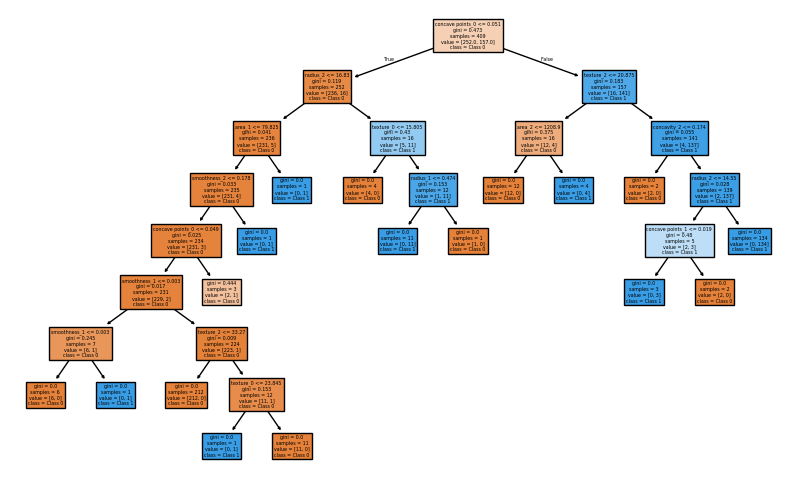

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=25, min_samples_split=5)
clf.fit(patient_X_train, patient_y_train)
print(clf.score(patient_X_val, patient_y_val))

# Plot Decision Tree directly in Jupyter
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=patient_X.columns, class_names=['Class 0', 'Class 1'])
plt.show()


In [ ]:
##

## Random Forest

In [9]:
from randomforest_classifier import *

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(patient_X_train, patient_y_train)

# Make predictions on the test set
y_pred = rf_model.predict(patient_X_val)
# Evaluate the model
accuracy = accuracy_score(patient_y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(patient_y_val, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(patient_y_val, y_pred))


Accuracy: 0.9612

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.95      0.95      0.95        38

    accuracy                           0.96       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.96      0.96      0.96       103


Confusion Matrix:
[[63  2]
 [ 2 36]]


In [12]:
param = {
    'n_estimators': [25, 75, 150, 225, 300],  
    'min_samples_split': [2, 5, 10], 
    'criterion' : ["gini", "entropy", "log_loss"]
}

randomforest_model = best_randomforest(patient_X, patient_y, param)

y_pred = randomforest_model.predict(patient_X_test)

evaluate_model(patient_y_test, y_pred, "random forest")

Fitting 5 folds for each of 45 candidates, totalling 225 fits

Best Hyperparameters selected are: {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 300}

 Accuracy of random forest: 0.9649122807017544

Confusion Matrix for random forest:
[[39  1]
 [ 1 16]]

Classification Report for random forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.94      0.94      0.94        17

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57




Top Important Features:
                Feature  Importance
22          perimeter_2    0.136548
23               area_2    0.126271
27     concave points_2    0.122447
7      concave points_0    0.098506
20             radius_2    0.069647
6           concavity_0    0.049877
0              radius_0    0.048708
26          concavity_2    0.041292
2           perimeter_0    0.039418
3                area_0    0.035152
13               area_1    0.029767
21            texture_2    0.025312
1             texture_0    0.020059
25        compactness_2    0.016980
5         compactness_0    0.016647
24         smoothness_2    0.016335
10             radius_1    0.015580
28           symmetry_2    0.013151
12          perimeter_1    0.009583
4          smoothness_0    0.008073
16          concavity_1    0.007327
17     concave points_1    0.006994
29  fractal dimension_2    0.006894
9   fractal dimension_0    0.006542
19  fractal dimension_1    0.005938
14         smoothness_1    0.005832
15 

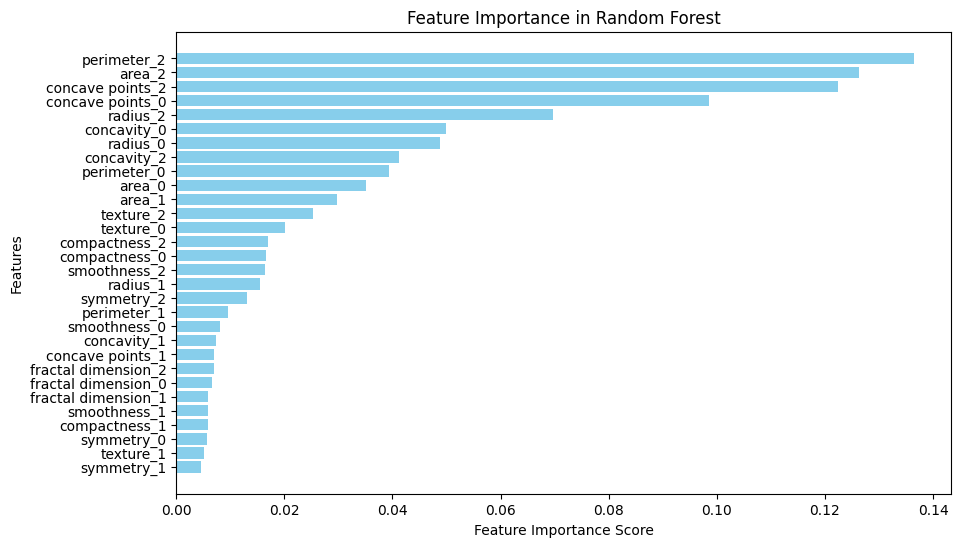

In [21]:

# Get feature importance scores
feature_importances = randomforest_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
importance_df = pd.DataFrame({'Feature': patient_X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("\nTop Important Features:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## possible third approach

In [29]:
import numpy as np
import random
from copy import deepcopy
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -------------------------------
# Helper Functions for GA
# -------------------------------

def initialize_population(pop_size, chrom_length):
    """Initialize a population of individuals with random genes in [0,1]."""
    return [np.random.rand(chrom_length) for _ in range(pop_size)]

def uniform_crossover(parent1, parent2):
    """Perform uniform crossover between two parents."""
    child1 = parent1.copy()
    child2 = parent2.copy()
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i], child2[i] = child2[i], child1[i]
    return child1, child2

def mutate(individual, mutation_rate, sigma=0.1):
    """Mutate an individual by adding Gaussian noise to each gene with a given probability."""
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.normal(0, sigma)
            # Clip gene to [0,1]
            individual[i] = np.clip(individual[i], 0.0, 1.0)

def tournament_selection(population, fitnesses, tournament_size):
    """Select an individual using tournament selection."""
    selected = random.sample(list(zip(population, fitnesses)), tournament_size)
    selected.sort(key=lambda x: x[1], reverse=True)  # higher fitness is better
    return deepcopy(selected[0][0])

# -------------------------------
# GA-Based Rule-Based Classifier
# -------------------------------

class GARuleBasedClassifier:
    def __init__(self, n_rules, n_features, n_classes, feature_ranges):
        """
        Parameters:
            n_rules: Number of rules in the rule set.
            n_features: Number of features in the data.
            n_classes: Number of target classes.
            feature_ranges: List of (min, max) tuples for each feature.
        """
        self.n_rules = n_rules
        self.n_features = n_features
        self.n_classes = n_classes
        self.feature_ranges = feature_ranges
        # Each rule has: for each feature -> (use_flag, operator, threshold) and then one gene for predicted class.
        self.rule_length = n_features * 3 + 1
        self.chromosome_length = self.n_rules * self.rule_length
        self.best_individual = None  # best chromosome after GA
        self.default_class = None  # majority class in training data

    def _rule_matches(self, rule, x):
        """
        Check if a rule fires on a single sample x.
        The rule is a vector of length (n_features*3 + 1); the last gene encodes the predicted class.
        """
        for i in range(self.n_features):
            # Extract genes for feature i
            base = 3 * i
            use_flag = 1 if rule[base] >= 0.5 else 0
            if use_flag:
                op = '>' if rule[base + 1] >= 0.5 else '<='
                thresh_norm = rule[base + 2]  # normalized threshold in [0,1]
                fmin, fmax = self.feature_ranges[i]
                threshold = fmin + thresh_norm * (fmax - fmin)
                # Check condition on feature i
                if op == '<=' and not (x[i] <= threshold):
                    return False
                if op == '>' and not (x[i] > threshold):
                    return False
        return True

    def _predict_individual(self, individual, X):
        """
        Predict labels for dataset X using the rule set encoded in the individual.
        """
        y_pred = []
        for x in X:
            predicted = None
            # Iterate over rules in order
            for r in range(self.n_rules):
                start = r * self.rule_length
                end = start + self.rule_length
                rule = individual[start:end]
                if self._rule_matches(rule, x):
                    # Decode predicted class from the last gene of the rule
                    pred = int(round(rule[-1] * (self.n_classes - 1)))
                    pred = np.clip(pred, 0, self.n_classes - 1)
                    predicted = pred
                    break
            # If no rule fires, return default class
            if predicted is None:
                predicted = self.default_class
            y_pred.append(predicted)
        return np.array(y_pred)

    def _fitness(self, individual, X, y):
        """Fitness is measured as classification accuracy on (X, y)."""
        y_pred = self._predict_individual(individual, X)
        return accuracy_score(y, y_pred)

    def fit(self, X, y, pop_size=50, generations=50, tournament_size=3, mutation_rate=0.1, crossover_rate=0.7):
        """
        Run the genetic algorithm to optimize the rule set.
        """
        # Store the majority class to use as default when no rule fires.
        self.default_class = Counter(y).most_common(1)[0][0]

        # Initialize population
        population = initialize_population(pop_size, self.chromosome_length)
        # Evaluate initial fitnesses
        fitnesses = [self._fitness(ind, X, y) for ind in population]
        best_fitness = max(fitnesses)
        best_ind = deepcopy(population[np.argmax(fitnesses)])
        print(f"Initial best fitness: {best_fitness:.4f}")

        # GA loop
        for gen in range(generations):
            new_population = []
            while len(new_population) < pop_size:
                # Select parents via tournament selection
                parent1 = tournament_selection(population, fitnesses, tournament_size)
                parent2 = tournament_selection(population, fitnesses, tournament_size)
                # Crossover
                if random.random() < crossover_rate:
                    child1, child2 = uniform_crossover(parent1, parent2)
                else:
                    child1, child2 = deepcopy(parent1), deepcopy(parent2)
                # Mutation
                mutate(child1, mutation_rate)
                mutate(child2, mutation_rate)
                new_population.extend([child1, child2])
            # If population size is odd, trim the last extra individual
            if len(new_population) > pop_size:
                new_population = new_population[:pop_size]
            # Update population and evaluate fitness
            population = new_population
            fitnesses = [self._fitness(ind, X, y) for ind in population]
            cur_best = max(fitnesses)
            if cur_best > best_fitness:
                best_fitness = cur_best
                best_ind = deepcopy(population[np.argmax(fitnesses)])
            print(f"Generation {gen+1:02d} best fitness: {cur_best:.4f}")
        self.best_individual = best_ind
        print(f"GA optimization complete. Best fitness: {best_fitness:.4f}")

    def predict(self, X):
        """Predict labels for X using the optimized rule set."""
        if self.best_individual is None:
            raise ValueError("The classifier has not been fitted yet.")
        return self._predict_individual(self.best_individual, X)

    def print_rules(self):
        """Print a human-readable version of the rules."""
        if self.best_individual is None:
            print("No rules to display; the model is not trained yet.")
            return
        print("Optimized Rules (in order):")
        for r in range(self.n_rules):
            start = r * self.rule_length
            end = start + self.rule_length
            rule = self.best_individual[start:end]
            conditions = []
            for i in range(self.n_features):
                base = 3 * i
                use_flag = rule[base] >= 0.5
                if use_flag:
                    op = '>' if rule[base + 1] >= 0.5 else '<='
                    fmin, fmax = self.feature_ranges[i]
                    threshold = fmin + rule[base + 2] * (fmax - fmin)
                    conditions.append(f"Feature_{i} {op} {threshold:.2f}")
            pred = int(round(rule[-1] * (self.n_classes - 1)))
            pred = np.clip(pred, 0, self.n_classes - 1)
            if conditions:
                cond_str = " AND ".join(conditions)
                print(f"Rule {r+1}: IF {cond_str} THEN class = {pred}")
            else:
                print(f"Rule {r+1}: (No conditions) Predict class = {pred}")

# -------------------------------
# Example Usage
# -------------------------------

if __name__ == "__main__":
    # Use the Iris dataset for demonstration
    
    X_train = patient_X_train.to_numpy()
    y_train = patient_y_train.to_numpy()
    X_test = patient_X_test.to_numpy()
    y_test = patient_y_test.to_numpy()
    n_features = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    
    # Determine the range (min, max) for each feature
    feature_ranges = []
    for i in range(n_features):
        fmin, fmax = X_train[:, i].min(), X_train[:, i].max()
        feature_ranges.append((fmin, fmax))
    
    # Create and train the GA-based rule-based classifier
    n_rules = 5  # Number of rules in our classifier
    classifier = GARuleBasedClassifier(n_rules, n_features, n_classes, feature_ranges)
    classifier.fit(X_train, y_train, pop_size=50, generations=30, tournament_size=3, mutation_rate=0.1, crossover_rate=0.7)
    
    # Display the optimized rules
    classifier.print_rules()
    
    # Evaluate on the test set
    y_pred = classifier.predict(X_test)
    print("\nTest Accuracy:", accuracy_score(y_test, y_pred))


Initial best fitness: 0.6161
Generation 01 best fitness: 0.6479
Generation 02 best fitness: 0.6528
Generation 03 best fitness: 0.6528
Generation 04 best fitness: 0.6553
Generation 05 best fitness: 0.7139
Generation 06 best fitness: 0.7090
Generation 07 best fitness: 0.6944
Generation 08 best fitness: 0.6919
Generation 09 best fitness: 0.7213
Generation 10 best fitness: 0.7188
Generation 11 best fitness: 0.7628
Generation 12 best fitness: 0.7702
Generation 13 best fitness: 0.7775
Generation 14 best fitness: 0.8875
Generation 15 best fitness: 0.8875
Generation 16 best fitness: 0.8851
Generation 17 best fitness: 0.8924
Generation 18 best fitness: 0.8900
Generation 19 best fitness: 0.8949
Generation 20 best fitness: 0.8924
Generation 21 best fitness: 0.8949
Generation 22 best fitness: 0.8998
Generation 23 best fitness: 0.9046
Generation 24 best fitness: 0.9046
Generation 25 best fitness: 0.9046
Generation 26 best fitness: 0.8949
Generation 27 best fitness: 0.8998
Generation 28 best fitness

In [30]:
classifier.print_rules()

Optimized Rules (in order):
Rule 1: IF Feature_0 > 16.54 AND Feature_1 > 29.45 AND Feature_2 <= 165.38 AND Feature_4 > 0.11 AND Feature_5 > 0.26 AND Feature_6 <= 0.36 AND Feature_7 <= 0.09 AND Feature_8 > 0.11 AND Feature_9 <= 0.06 AND Feature_11 <= 2.50 AND Feature_12 <= 16.89 AND Feature_14 > 0.02 AND Feature_15 > 0.04 AND Feature_18 <= 0.02 AND Feature_22 > 174.59 AND Feature_23 <= 2477.57 AND Feature_25 > 0.81 AND Feature_26 <= 0.51 AND Feature_27 <= 0.09 THEN class = 1
Rule 2: IF Feature_3 <= 2501.00 AND Feature_5 > 0.02 AND Feature_12 > 1.55 AND Feature_16 <= 0.18 AND Feature_18 > 0.01 AND Feature_19 <= 0.01 AND Feature_20 > 15.43 AND Feature_21 <= 48.02 AND Feature_24 > 0.11 THEN class = 1
Rule 3: IF Feature_0 <= 17.44 AND Feature_2 > 66.43 AND Feature_4 > 0.12 AND Feature_6 <= 0.17 AND Feature_8 > 0.30 AND Feature_9 > 0.05 AND Feature_10 <= 2.81 AND Feature_12 > 7.91 AND Feature_13 > 446.91 AND Feature_14 > 0.03 AND Feature_17 <= 0.01 AND Feature_26 > 1.25 AND Feature_27 <= 0.1